In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200130a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200130a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200130a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 38946   45.012760  0.361591
 39066   51.040890  0.389015
 39186   57.260899  0.414122
 39306   63.651321  0.437148
 39426   70.219574  0.459278
 ...           ...       ...
 54066  899.428528  0.905149
 54186  876.743530  0.884867
 54306  870.625061  0.878421
 54426  864.062195  0.870886
 54546  856.276367  0.862399
 
 [131 rows x 2 columns],            time
 0       40774.0
 1       40774.1
 2       40774.2
 3       40774.3
 4       40774.4
 ...         ...
 137265  54500.5
 137266  54500.6
 137267  54500.7
 137268  54500.8
 137269  54500.9
 
 [137270 rows x 1 columns])

In [6]:
array = np.arange(38946,54501, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.drop(data_int.index[0:18280],inplace=True)
data_int.reset_index(inplace=True)
data_int['time']=data_int.loc[:,'index']
data_int.drop('index',axis=1,inplace=True)
data_int
#data_int[data_int.time==40774]
#df_r = data_int.iloc[0:274510,:]
#df_r

,F_dw,f_dir,time
0,157.897631,0.648412,40774
1,157.929491,0.648538,40774
2,157.961350,0.648664,40774
3,157.993210,0.648791,40774
4,158.025070,0.648917,40774
...,...,...,...
137265,864.062195,0.870886,54500
137266,864.062195,0.870886,54500
137267,864.062195,0.870886,54500
137268,864.062195,0.870886,54500


In [8]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,40774,169.653656,9.820971,371.790894,468.976868,111.125656,11.280990,157.897631,0.648412
1,40774,169.091263,10.794214,378.192108,468.765472,111.125801,11.281421,157.929491,0.648538
2,40774,167.200638,10.777805,381.382202,468.574219,111.125946,11.281853,157.961350,0.648664
3,40774,164.757965,11.143498,388.020172,468.319000,111.126091,11.282284,157.993210,0.648791
4,40774,163.658417,12.062436,379.612518,468.880737,111.126236,11.282715,158.025070,0.648917
...,...,...,...,...,...,...,...,...,...
137265,54500,1033.848877,45.868385,404.150330,552.630615,151.702866,55.505199,864.062195,0.870886
137266,54500,1030.913940,45.266342,405.815887,552.592102,151.703568,55.505405,864.062195,0.870886
137267,54500,1030.788818,44.427807,409.849670,552.523132,151.704254,55.505611,864.062195,0.870886
137268,54500,1029.465454,44.854630,410.129364,553.349182,151.704956,55.505814,864.062195,0.870886


In [9]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,40774,169.653656,9.820971,371.790894,468.976868,111.125656,11.280990,157.897631,0.648412,0.517787,3.456990,75.965553
1,40774,169.091263,10.794214,378.192108,468.765472,111.125801,11.281421,157.929491,0.648538,0.571851,3.763384,75.973969
2,40774,167.200638,10.777805,381.382202,468.574219,111.125946,11.281853,157.961350,0.648664,0.624498,4.057534,75.990509
3,40774,164.757965,11.143498,388.020172,468.319000,111.126091,11.282284,157.993210,0.648791,0.638695,4.348866,76.019859
4,40774,163.658417,12.062436,379.612518,468.880737,111.126236,11.282715,158.025070,0.648917,0.649129,4.636240,76.053452
...,...,...,...,...,...,...,...,...,...,...,...,...
137265,54500,1033.848877,45.868385,404.150330,552.630615,151.702866,55.505199,864.062195,0.870886,-0.545044,1.698318,76.227486
137266,54500,1030.913940,45.266342,405.815887,552.592102,151.703568,55.505405,864.062195,0.870886,-0.376843,1.658742,76.185333
137267,54500,1030.788818,44.427807,409.849670,552.523132,151.704254,55.505611,864.062195,0.870886,-0.185561,1.638485,76.137344
137268,54500,1029.465454,44.854630,410.129364,553.349182,151.704956,55.505814,864.062195,0.870886,0.120105,1.626068,76.099373


In [10]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct


In [11]:
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_13feb.csv')

In [13]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(54500)

[15, 8, 20]

In [15]:
import datetime
start = datetime.datetime(2020, 1, 30, 11, 19, 34)
end = datetime.datetime(2020, 1, 30, 15, 8, 20)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_30jan.csv')

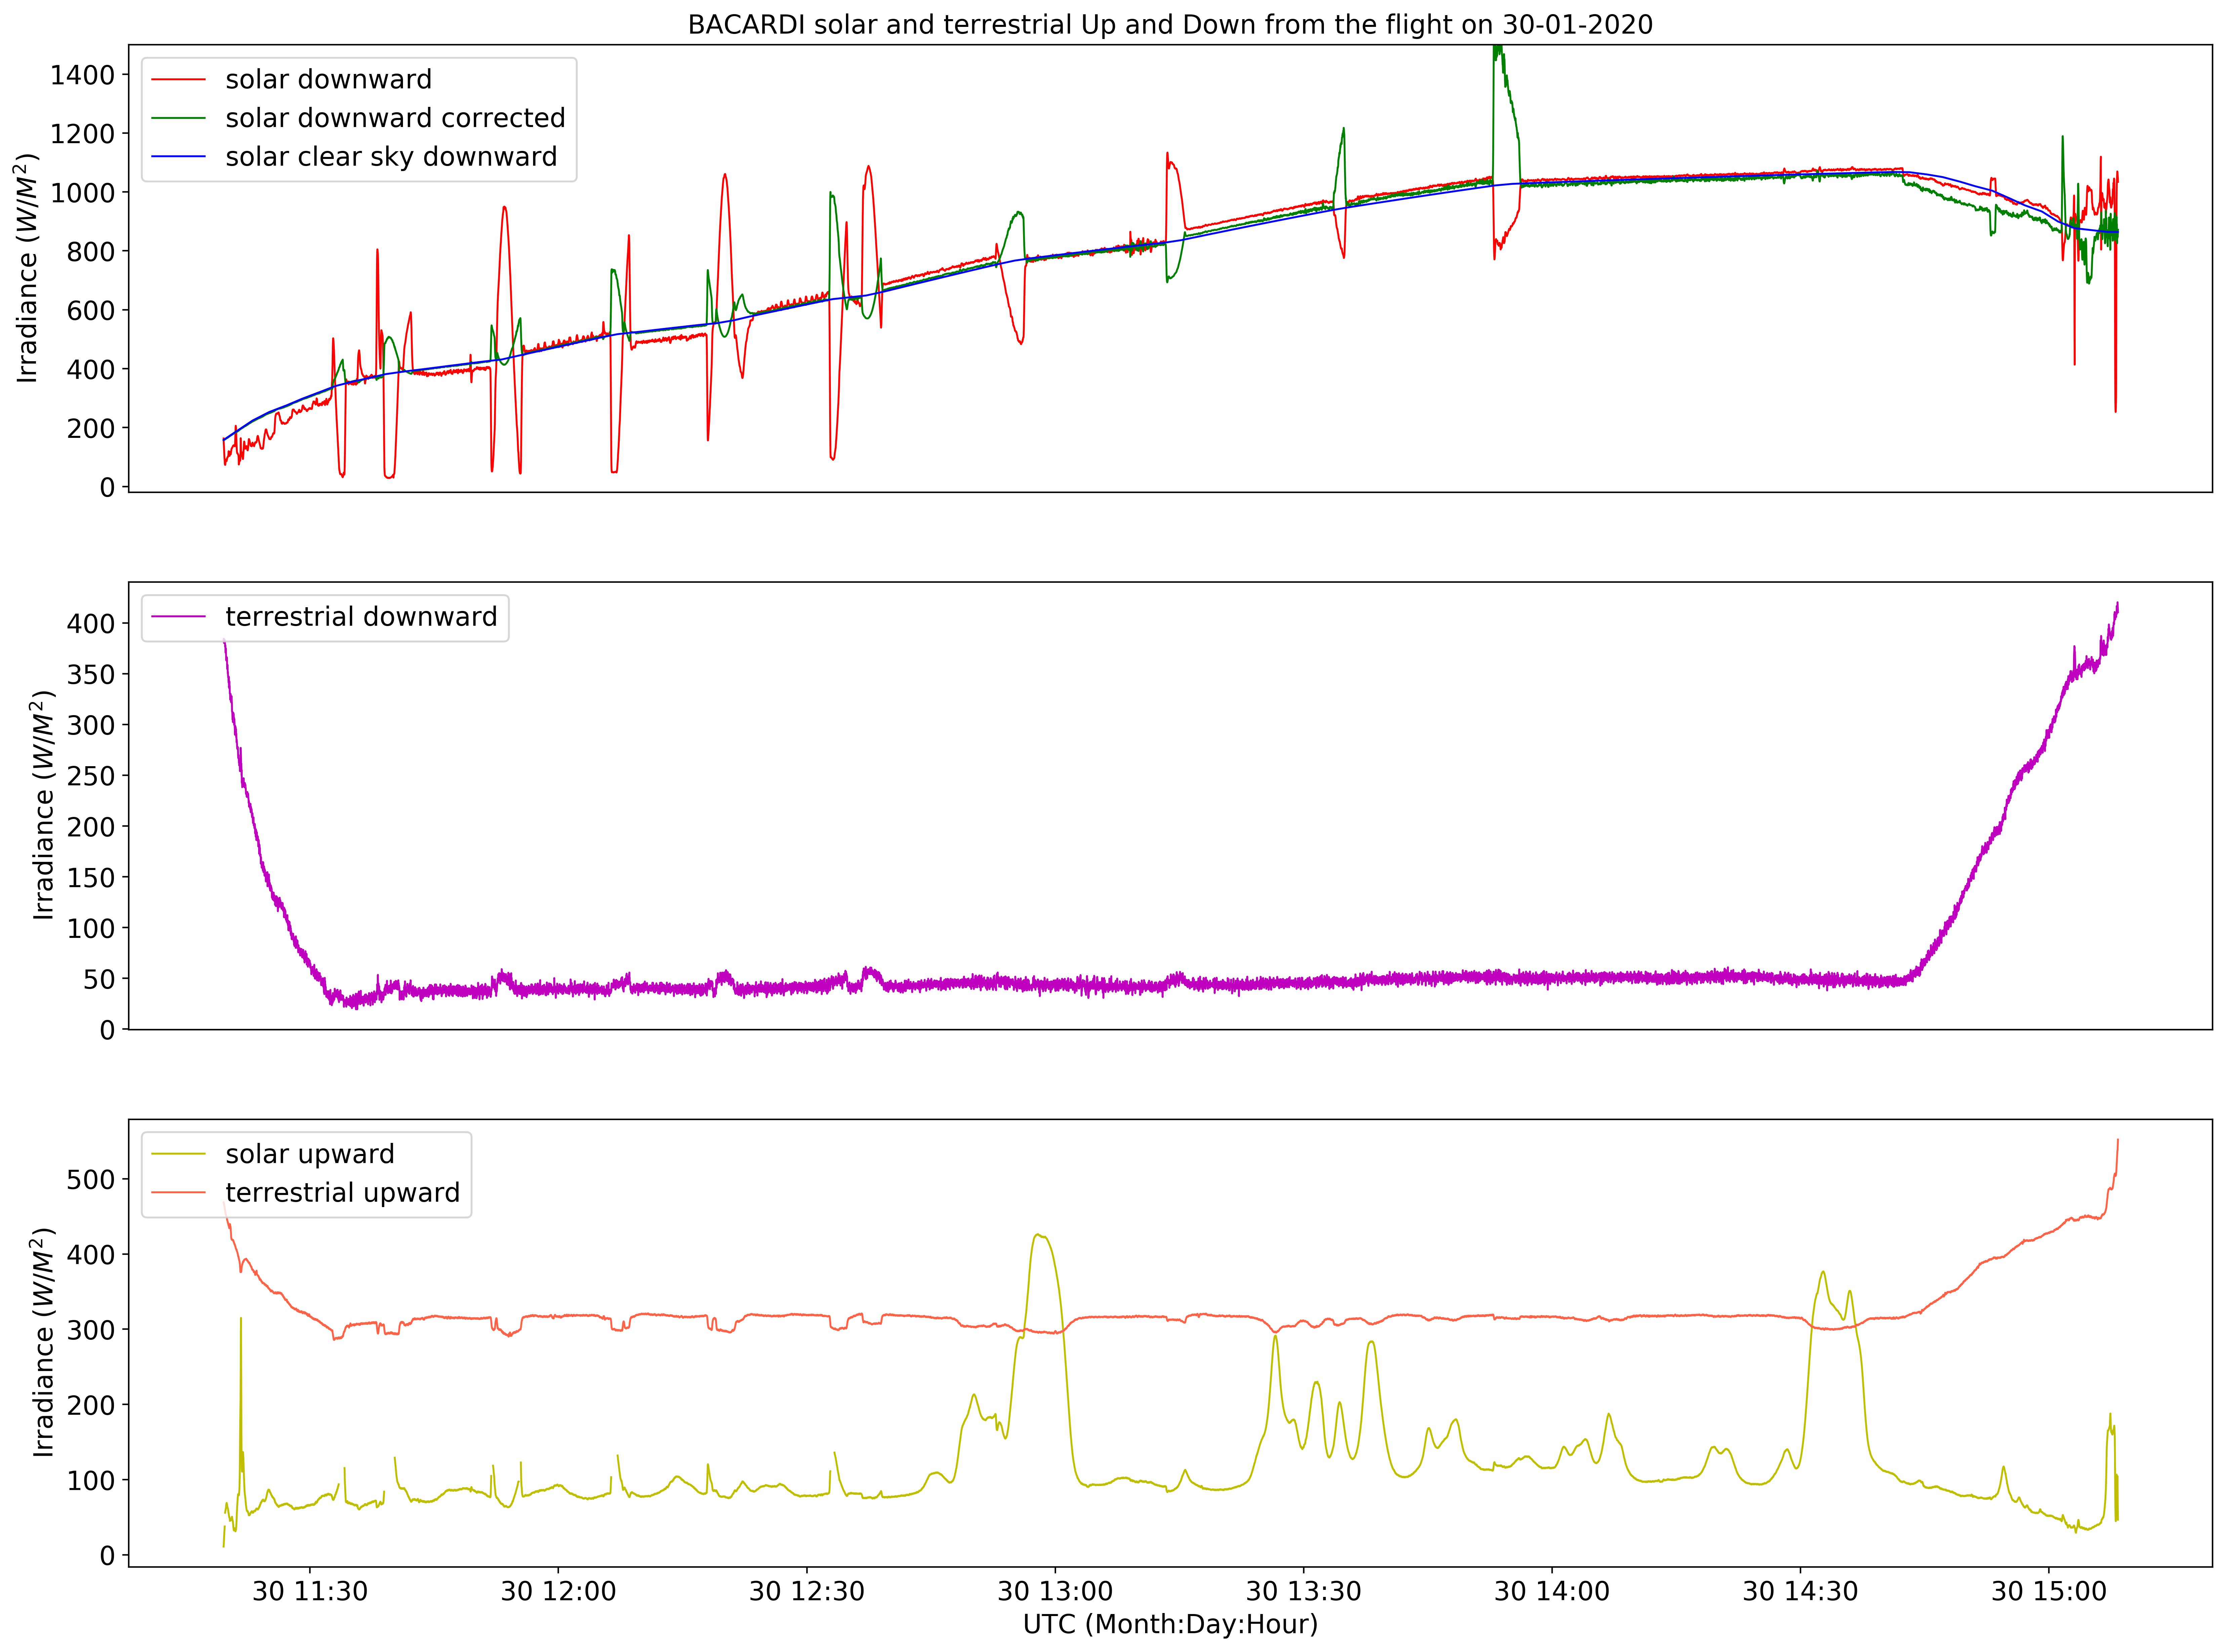

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 30-01-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.ylim(-20,1500)
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()